In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [3]:
#import train dataframe
train_df = pd.read_csv('train_airbnb_berlin.csv')
train_df.sort_values(by=['Price'],ascending=False,inplace=True)
train_df.head()


,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price
5051,33158292.0,*,2637248.0,Brugereuuere,2012-07-19,within a few hours,100%,f,KÃ¶penick,Treptow - KÃ¶penick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,900.0
7978,30802018.0,*,23174521.0,Team Living Hotel Weissensee,2014-12-16,within a day,100%,f,WeiÃensee,Pankow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,900.0
2304,27362302.0,*,104401443.0,Leo,2016-11-30,NaN,NaN,f,Wedding,Mitte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,845.0
12564,16697355.0,*,100273489.0,Claudia,2016-12-15,NaN,NaN,f,Wedding,Mitte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,820.0
1272,23531334.0,*,16439251.0,Fronc,2014-05-30,NaN,NaN,f,Wedding,Mitte,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,810.0


In [4]:
print(f'{train_df.shape[0]} rows')
print(f'{train_df.shape[1]} columns')

15692 rows
39 columns


In [5]:
#analysis categorical
corrtrain_df=pd.DataFrame()
le = LabelEncoder()
for col in train_df.columns :
    if train_df[col].dtype == object :
        corrtrain_df[col]=le.fit_transform(train_df[col])


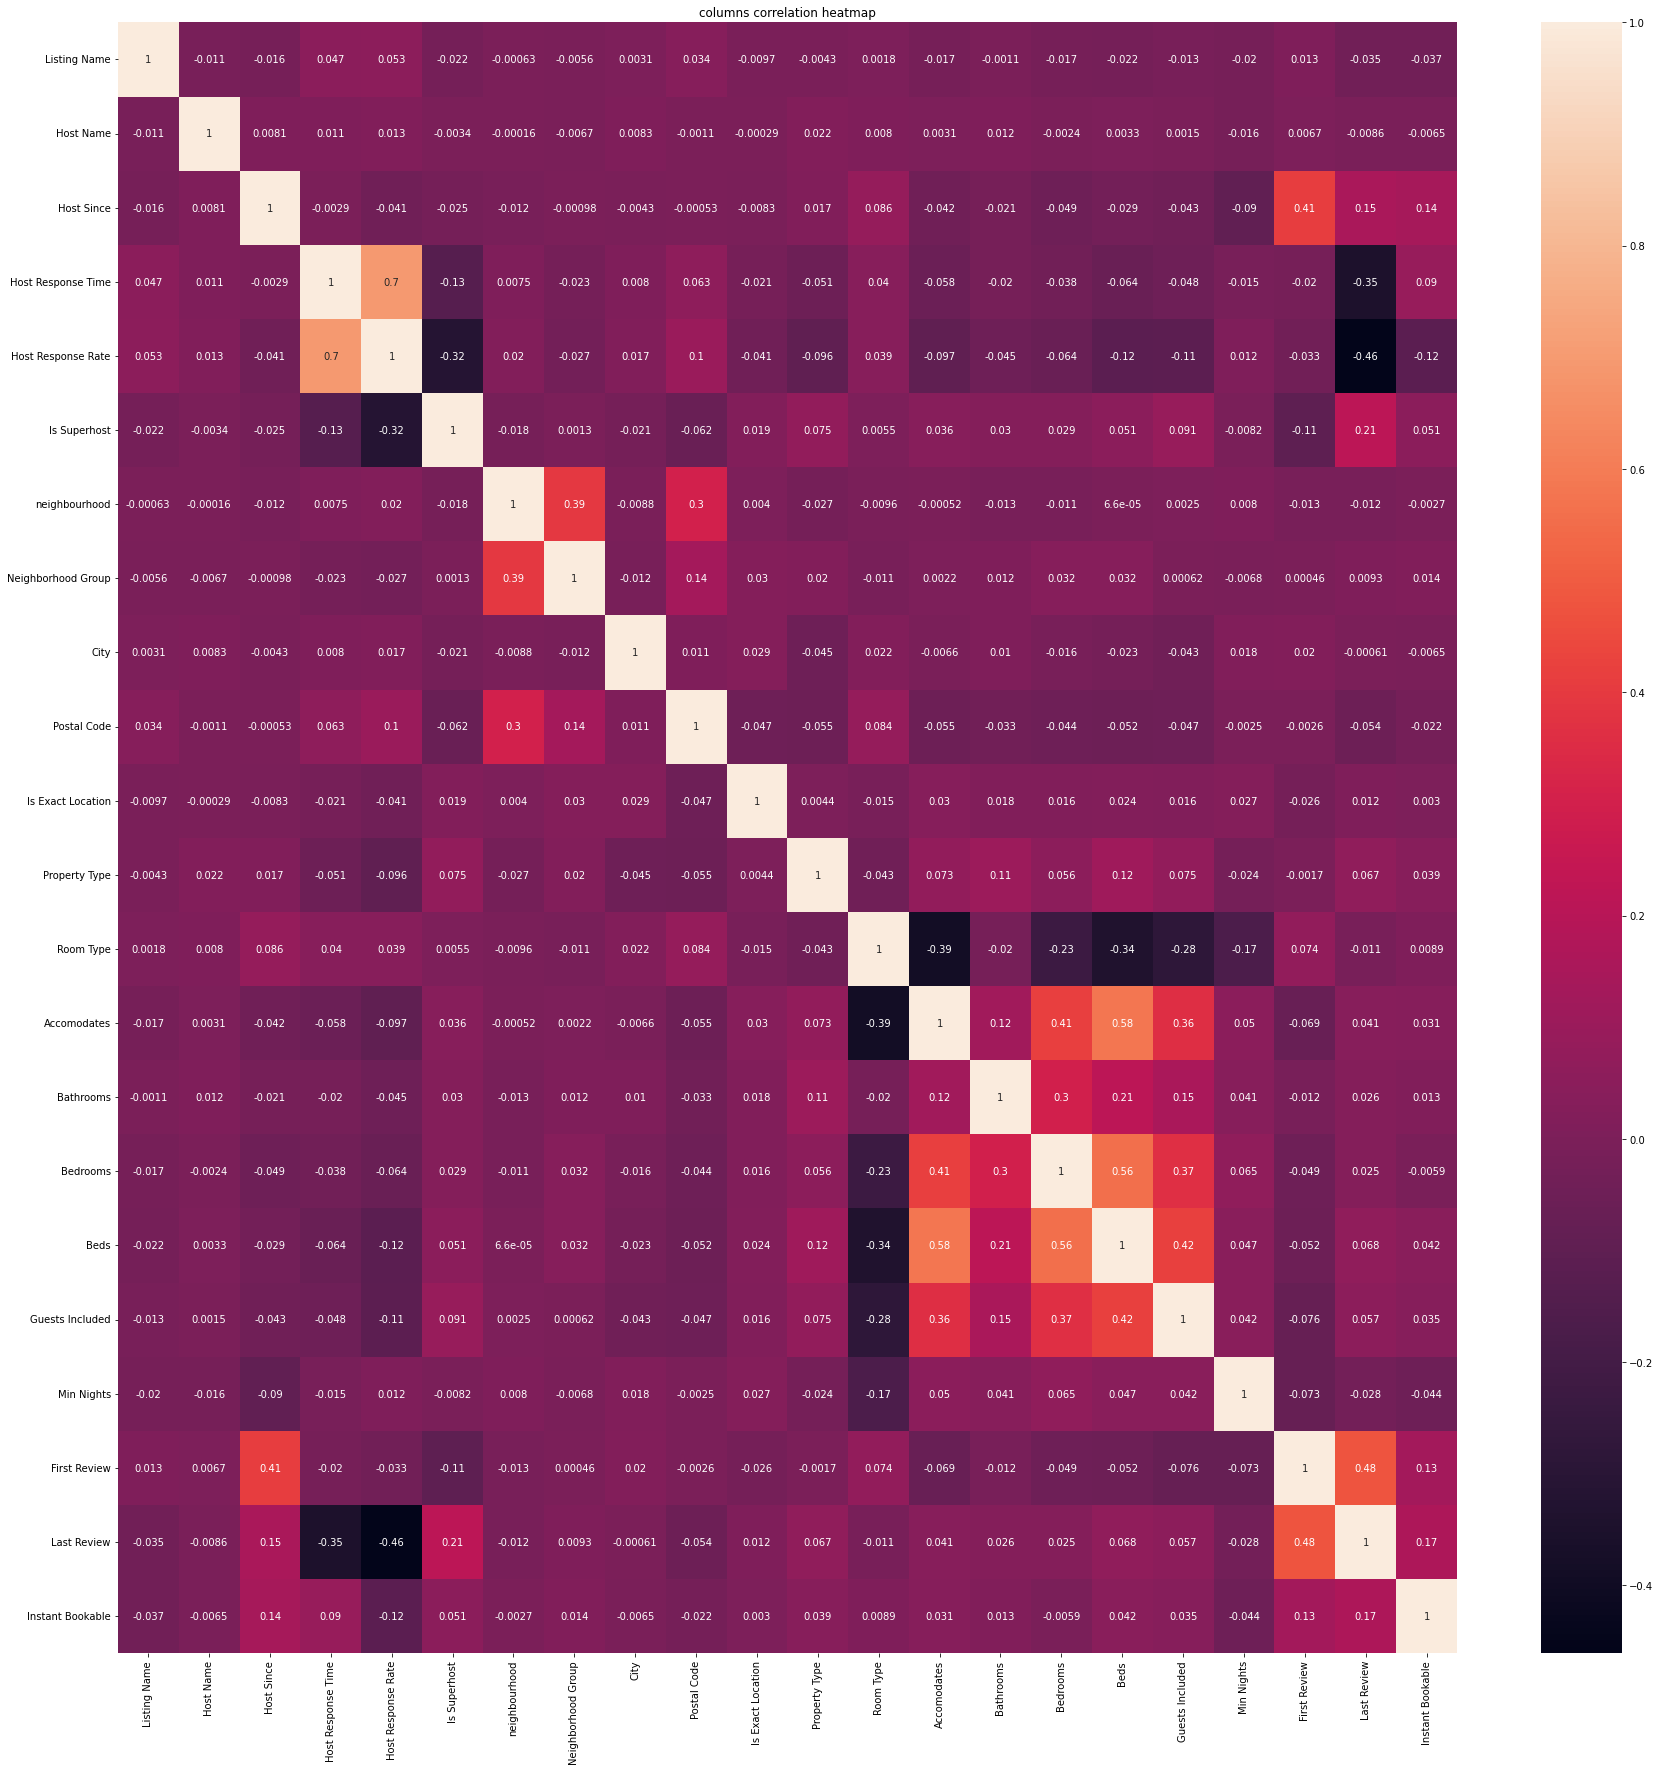

In [6]:
corrtrain_df.drop(columns=['Country','Country Code','Business Travel Ready'],inplace = True)
plt.figure(figsize=(30,30))
sns.heatmap(corrtrain_df.corr(),annot=True)
plt.title('columns correlation heatmap')
plt.show()

In [7]:
#check null value

#columns with null value
null_values = train_df.isnull().sum()
null_coumn = train_df.columns[null_values != 0]
print('null column with number of missid values :')
print(null_values[null_values > 0])

null column with number of missid values :
Listing ID                  1
Listing Name               54
Host Name                  22
Host Since                 21
Host Response Time       7075
Host Response Rate       7075
Is Superhost               23
City                        1
Postal Code               229
Bathrooms                  14
Bedrooms                    5
Beds                        8
Square Feet             15389
First Review             2705
Last Review              2706
Overall Rating           2962
Accuracy Rating          2971
Cleanliness Rating       2970
Checkin Rating           2973
Communication Rating     2970
Location Rating          2971
Value Rating             2972
Price                       9
dtype: int64


## analysis categorical data

In [8]:
#analysis categorical
for col in train_df.columns :
    if train_df[col].dtype == object :
       print(col, train_df[col].value_counts().count())


Listing Name 1
Host Name 11508
Host Since 3029
Host Response Time 4
Host Response Rate 34
Is Superhost 2
neighbourhood 63
Neighborhood Group 12
City 2
Postal Code 185
Country Code 1
Country 1
Is Exact Location 2
Property Type 16
Room Type 3
Accomodates 13
Bathrooms 8
Bedrooms 7
Beds 12
Guests Included 8
Min Nights 25
First Review 2243
Last Review 1450
Instant Bookable 2
Business Travel Ready 1


In [9]:
# as Neighborhood Group similar to neighbourhood  i will drop neighbourhood column as it has to much differnt values ['neighbourhood']
#all city in data located in Berlin so droping columns : ['city','Country Code','Country' ]
#as i am not dealing with time series data we can neglect date columns ['Host Since' ,'First Review','Last Review']
#'Business Travel Ready' containing one value 


### Host Response Time analysis

In [10]:
def plot_column(col_name):
    plt.figure(figsize=(8,8))
    train_df.groupby([col_name])[col_name].count().sort_values(ascending=False).plot(kind='bar')
    plt.title(col_name+'frequency')
    plt.ylabel('frequency')
    plt.xlabel(col_name)
    plt.show()
    
    print('avg price for each label :')
    group_response_time_df=train_df.pivot_table(index=[col_name],values='Price',aggfunc=np.mean).sort_values(by='Price',ascending=False)

    print(group_response_time_df)
    group_response_time_df.plot(kind='bar',legend='')
    plt.title('avg price for '+col_name)
    plt.ylabel('avg price')
    plt.xlabel(col_name)
    plt.show()

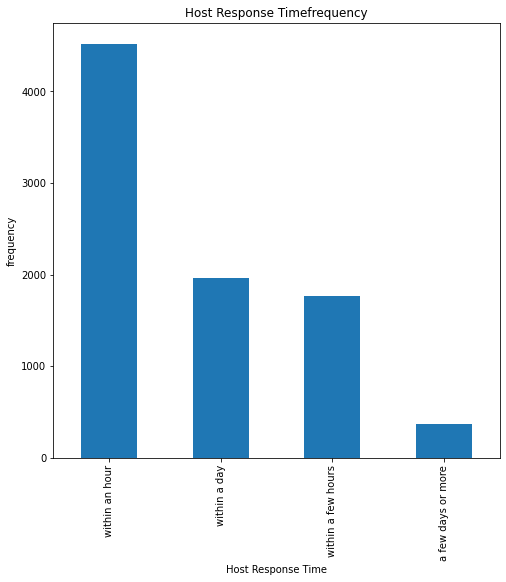

avg price for each label :
                        Price
Host Response Time           
within an hour      68.459220
within a few hours  66.585933
within a day        62.788403
a few days or more  62.427793


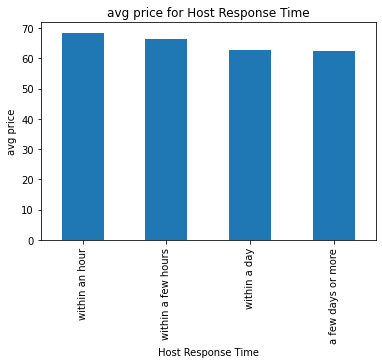

In [11]:
plot_column('Host Response Time')

In [12]:
#Host Response Time categry have Approximately midum corr and it have lagre number of missing data(7075) and same to Host Response Rate
#drop two columns 'Host Response Time','Host Response Rate'


### Is Superhost analysis

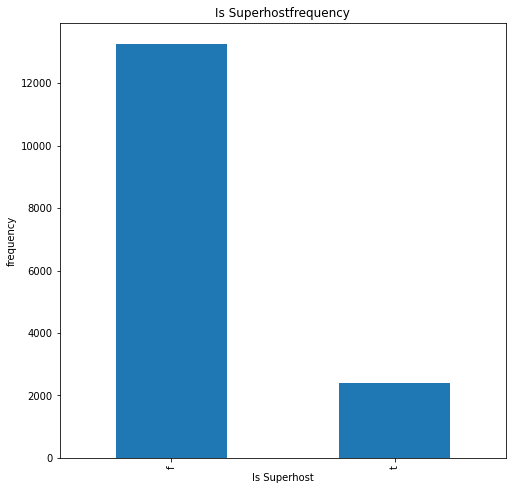

avg price for each label :
                  Price
Is Superhost           
t             69.594853
f             58.692099


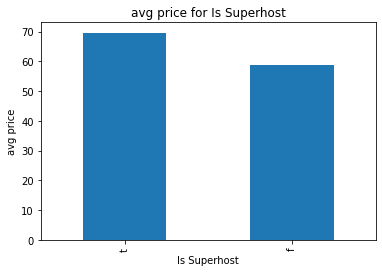

In [13]:
plot_column('Is Superhost')

In [14]:
#if Is Superhost true(t) it cost more price  than false(f)
#it has 23 missing data
#i think it will work in model

### Neighborhood Group analysis

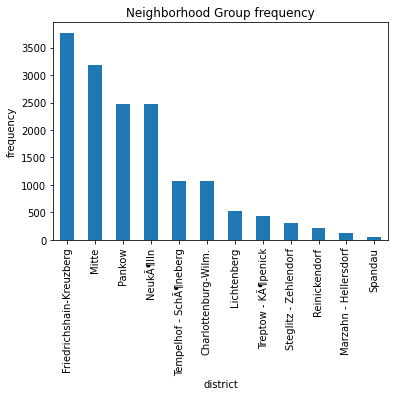

avg price for each label :
                              Price
Neighborhood Group                 
Charlottenburg-Wilm.      68.653447
Mitte                     66.632840
Pankow                    64.868985
Friedrichshain-Kreuzberg  61.033439
Spandau                   58.338983
Tempelhof - SchÃ¶neberg   58.167748
Marzahn - Hellersdorf     57.188976
Steglitz - Zehlendorf     55.741722
Treptow - KÃ¶penick       51.758621
Lichtenberg               51.028846
NeukÃ¶lln                 49.642915
Reinickendorf             45.247706


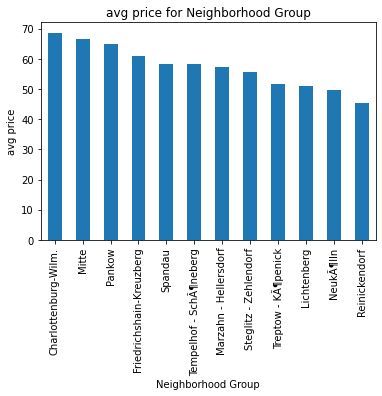

In [15]:
# print(train_df['Neighborhood Group'].value_counts())
# plt.figure(figsize=(15,10))
train_df.groupby(['Neighborhood Group'])['Neighborhood Group'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Neighborhood Group frequency')
plt.ylabel('frequency')
plt.xlabel('district')
plt.show()

print('avg price for each label :')
group_response_time_df=train_df.pivot_table(index=['Neighborhood Group'],values='Price',aggfunc=np.mean).sort_values(by='Price',ascending=False)
print(group_response_time_df)

group_response_time_df.plot(kind='bar',legend='')

plt.title('avg price for Neighborhood Group')
plt.ylabel('avg price')
plt.xlabel('Neighborhood Group')
plt.show()

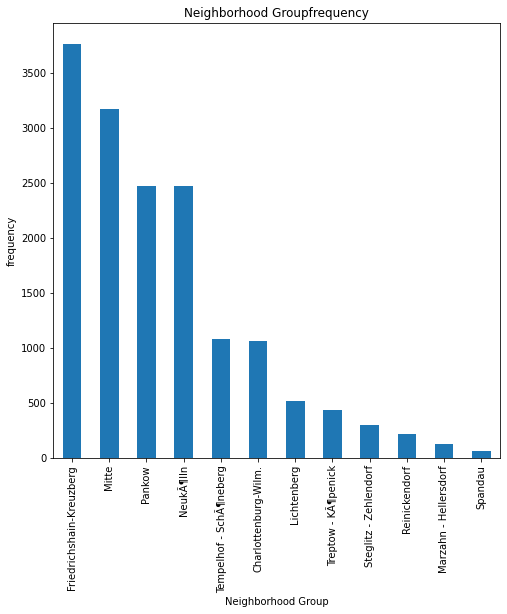

avg price for each label :
                              Price
Neighborhood Group                 
Charlottenburg-Wilm.      68.653447
Mitte                     66.632840
Pankow                    64.868985
Friedrichshain-Kreuzberg  61.033439
Spandau                   58.338983
Tempelhof - SchÃ¶neberg   58.167748
Marzahn - Hellersdorf     57.188976
Steglitz - Zehlendorf     55.741722
Treptow - KÃ¶penick       51.758621
Lichtenberg               51.028846
NeukÃ¶lln                 49.642915
Reinickendorf             45.247706


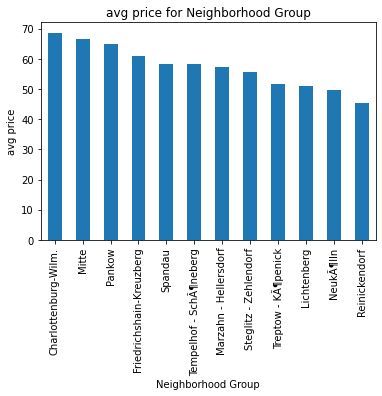

In [16]:
plot_column('Neighborhood Group')

### Property Type

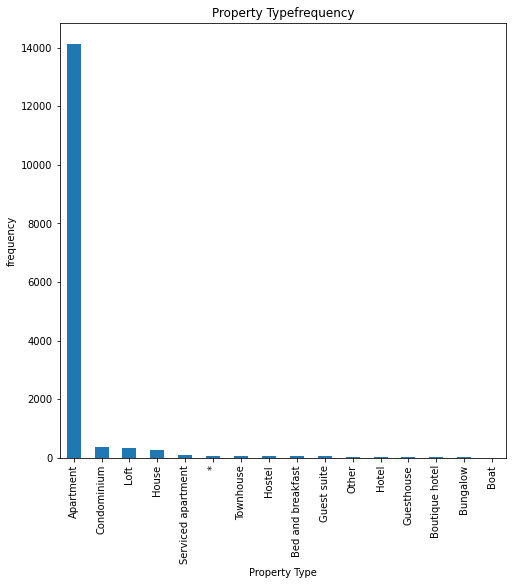

avg price for each label :
                         Price
Property Type                 
Hotel               144.035714
Serviced apartment  119.336207
Loft                114.161677
Boat                108.857143
*                    95.013333
Boutique hotel       86.789474
Condominium          73.029412
Bungalow             72.733333
Guesthouse           67.181818
Guest suite          65.836735
House                63.208481
Townhouse            63.058824
Apartment            57.826918
Other                56.166667
Bed and breakfast    51.254902
Hostel               45.789474


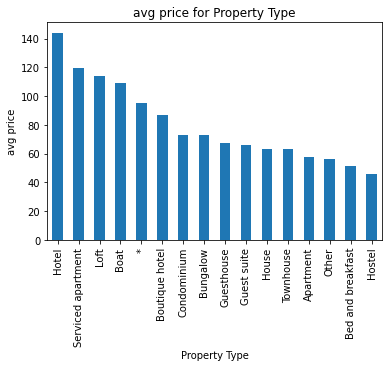

In [17]:
plot_column('Property Type')

In [18]:
#we have 15 different type of property type the most frequent one is Apartment
#could convert it to one hot encoding and use it

### Room Type Analysis

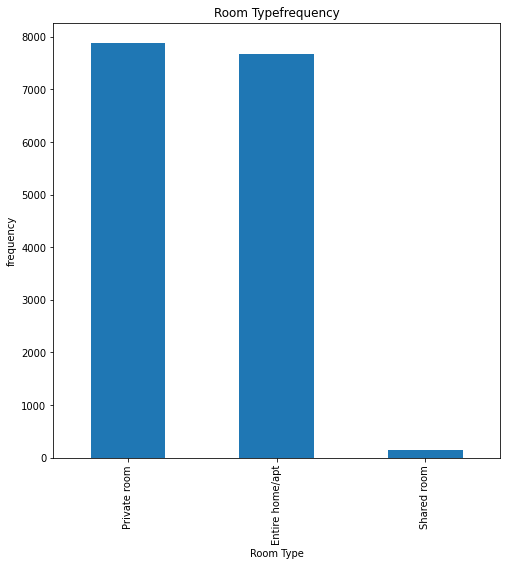

avg price for each label :
                     Price
Room Type                 
Entire home/apt  80.931646
Private room     40.749269
Shared room      35.682432


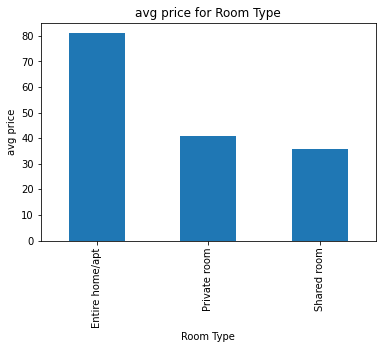

In [19]:
plot_column('Room Type')

In [20]:
#we have 3 different type of property type the most frequent one is Entire home/apt
#i think it's has strong corr with price and it consider important aspect in the model
#could convert it to one hot encoding and use it

### Accomodates Analysis
tha number of persons can fit in room

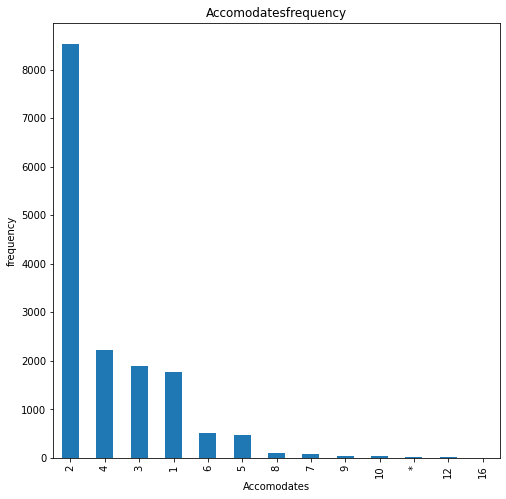

avg price for each label :
                  Price
Accomodates            
16           342.500000
10           204.735294
*            199.894737
12           198.800000
9            176.567568
8            153.370000
7            139.050000
6            123.761719
5            102.923241
4             82.643081
3             65.774655
2             48.658099
1             35.770575


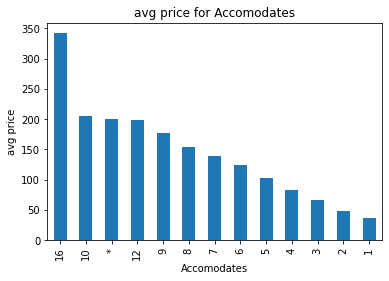

In [21]:
plot_column('Accomodates')

In [22]:
#we have 13 different Accomodates size most frequent Airbnb is can fit two persons
#could convert it to integer and replace other with any integer number between 10-15 mybe 11
#the more persons room fit the more price it cost but not must ,there is room for one but is more expensive tahn 16-person room

### Bathrooms,Bedrooms ,Beds analysis

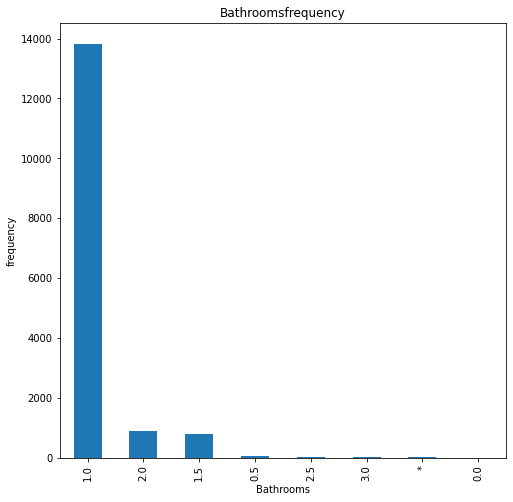

avg price for each label :
                Price
Bathrooms            
3.0        206.750000
*          142.727273
2.5        142.209302
2.0        100.968785
1.5         69.917085
1.0         56.643296
0.0         44.571429
0.5         42.757576


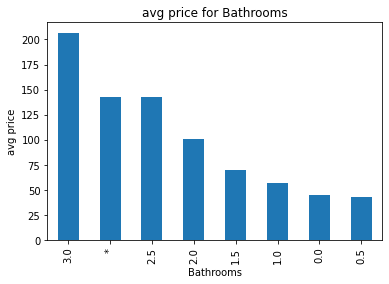

In [23]:
plot_column('Bathrooms')

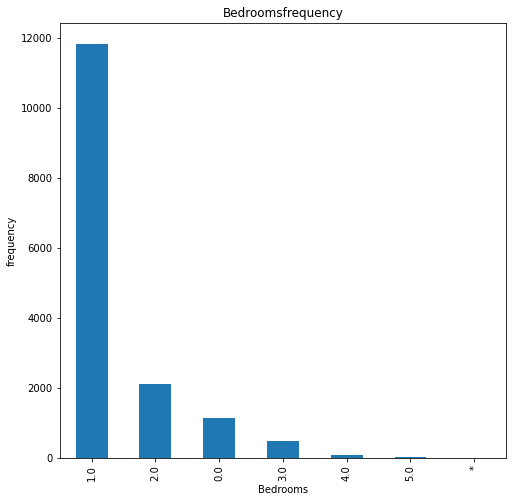

avg price for each label :
               Price
Bedrooms            
*         215.636364
5.0       208.300000
4.0       175.787500
3.0       141.548454
2.0        94.135890
0.0        58.143854
1.0        50.012603


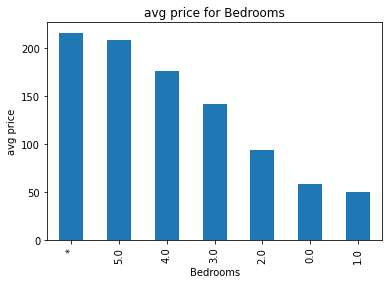

In [24]:
plot_column('Bedrooms')

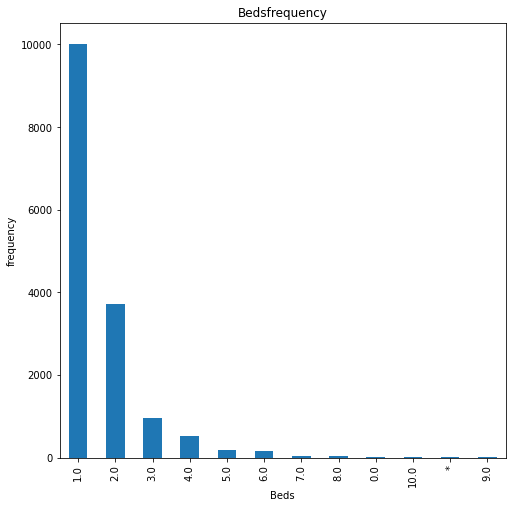

avg price for each label :
           Price
Beds            
*     245.083333
8.0   198.281250
9.0   193.100000
10.0  167.285714
7.0   149.969697
6.0   121.966887
5.0   117.258427
4.0   110.583019
3.0    96.829193
2.0    68.674926
0.0    64.909091
1.0    47.887957


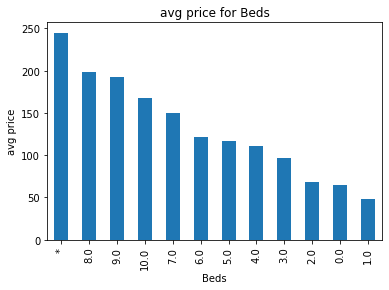

In [25]:
plot_column('Beds')

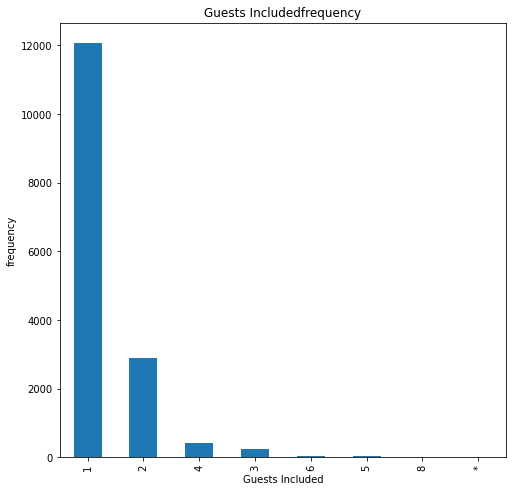

avg price for each label :
                      Price
Guests Included            
8                252.384615
6                203.918919
5                155.888889
4                128.548780
3                100.116000
*                 95.800000
2                 74.457521
1                 52.873248


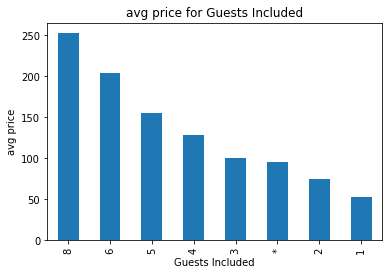

In [26]:
plot_column('Guests Included')

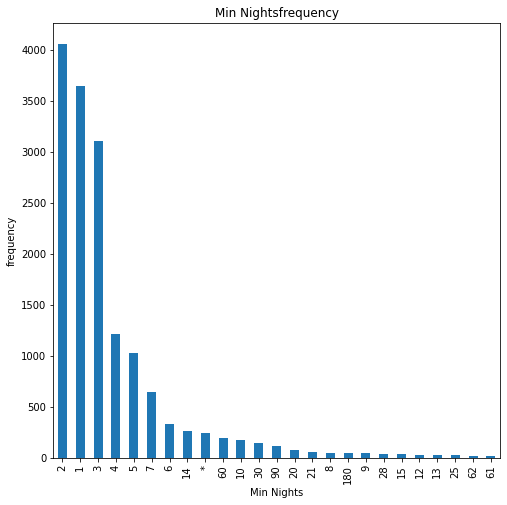

avg price for each label :
                Price
Min Nights           
90          70.587719
180         68.866667
61          67.611111
62          66.700000
4           64.526749
60          64.255000
3           64.235995
6           64.172619
5           63.646259
30          62.178808
2           59.994341
9           58.911111
7           58.746544
1           56.728520
10          53.735632
21          53.672414
14          53.375479
28          52.666667
*           52.056225
12          51.096774
8           50.230769
15          49.175000
13          48.033333
20          47.716049
25          37.142857


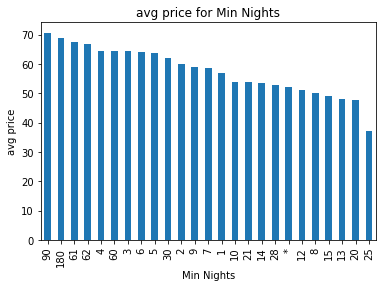

In [27]:
plot_column('Min Nights')

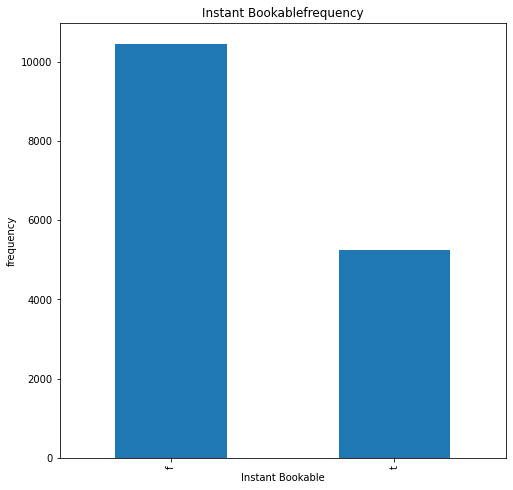

avg price for each label :
                      Price
Instant Bookable           
t                 63.075894
f                 58.975220


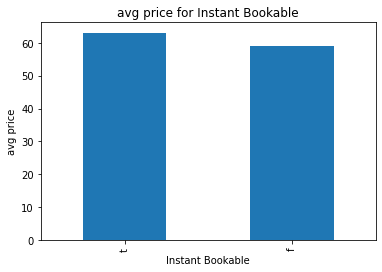

In [28]:
plot_column('Instant Bookable')

In [29]:
for col in train_df.columns :
    if train_df[col].dtype == object :
       print(col, train_df[col].value_counts().count())

Listing Name 1
Host Name 11508
Host Since 3029
Host Response Time 4
Host Response Rate 34
Is Superhost 2
neighbourhood 63
Neighborhood Group 12
City 2
Postal Code 185
Country Code 1
Country 1
Is Exact Location 2
Property Type 16
Room Type 3
Accomodates 13
Bathrooms 8
Bedrooms 7
Beds 12
Guests Included 8
Min Nights 25
First Review 2243
Last Review 1450
Instant Bookable 2
Business Travel Ready 1


## Numerical analysis

In [30]:
train_df.describe()

,Listing ID,Host ID,Latitude,Longitude,Square Feet,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
count,1.569100e+04,1.569200e+04,15692.000000,15692.000000,303.000000,15692.000000,12730.000000,12721.000000,12722.000000,12719.000000,12722.000000,12721.000000,12720.000000,15683.000000
mean,1.780062e+07,6.119042e+07,52.509893,13.407334,445.900990,19.452014,94.717282,9.717475,9.328407,9.769164,9.779201,9.556874,9.458097,60.342983
std,9.952544e+06,6.739421e+07,0.031286,0.058646,414.817342,39.483853,7.069787,0.671793,1.023807,0.620347,0.619545,0.731109,0.788891,48.829687
min,2.241500e+04,1.101500e+04,52.369270,13.121400,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000
25%,9.052831e+06,9.274528e+06,52.488920,13.376025,0.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,32.000000
50%,1.865037e+07,3.358182e+07,52.509100,13.417250,440.000000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,49.000000
75%,2.611308e+07,9.325677e+07,52.532713,13.439750,700.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,70.000000
max,3.467450e+07,2.609698e+08,52.639670,13.709020,1912.000000,424.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,900.000000


<AxesSubplot:>

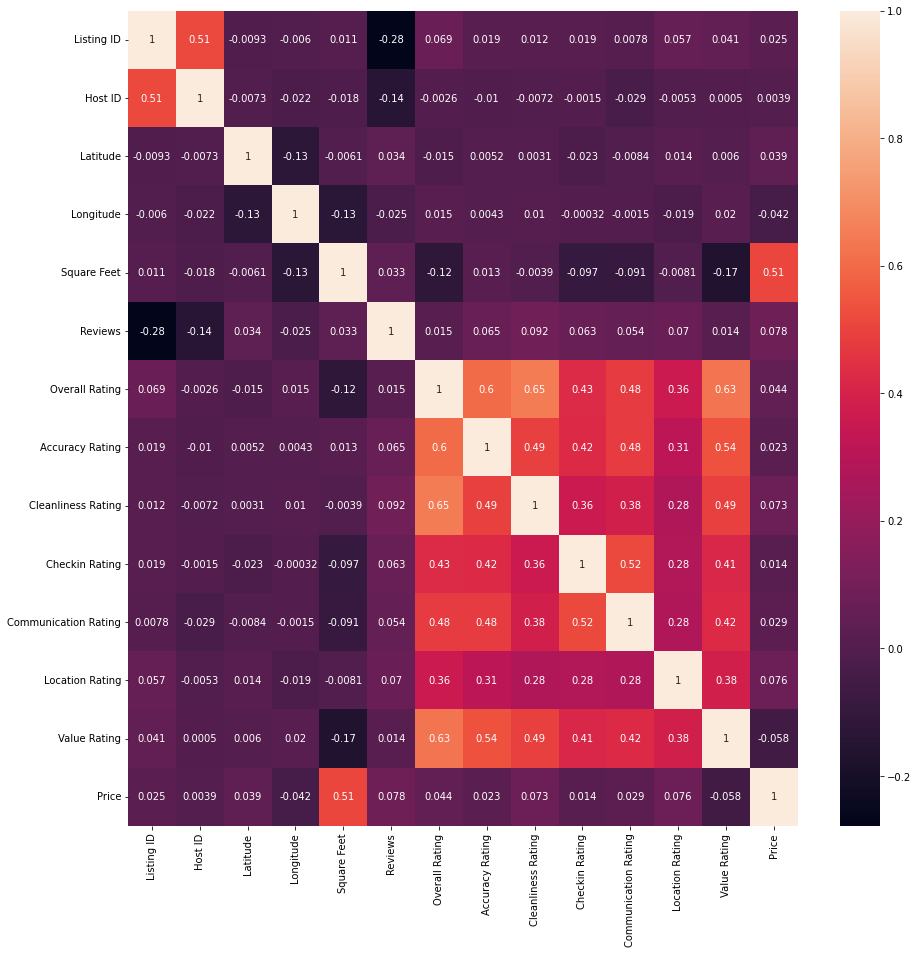

In [31]:
#correlation between price (target label) and other numeric columns
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),annot=True)
#price has strong correlated with square feet column but it has alot of missing data
#Latitude ,Longitude has no imapct with our model
#overall rating contain and have positive relation with ('Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating',
# 'Communication Rating', 'Location Rating', 'Value Rating')
#and it have low correltaion with price
#Reviews have low correltaion with price